<a href="https://colab.research.google.com/github/ominivac/analise_integraSUS/blob/master/Analise_de_dados_do_IntegraSUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [9]:
import plotly
import numpy as np
import plotly.offline as py
from plotly.offline import plot, iplot
plotly.offline.init_notebook_mode(connected=True)
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
import pandas as pd
df = pd.read_csv("/content/drive/My Drive/IntegraSUS/casos_coronavirus_2020_09_02.csv", low_memory=False)

In [11]:
 #quantidad de registros
df.shape

(765013, 43)

In [12]:
df.dtypes

Unnamed: 0                            int64
codigoPaciente                       object
paisPaciente                         object
estadoPaciente                       object
codigoMunicipioPaciente             float64
municipioPaciente                    object
bairroPaciente                       object
sexoPaciente                         object
idadePaciente                       float64
dataNotificacao                      object
dataSolicitacaoExame                 object
dataResultadoExame                   object
dataColetaExame                      object
resultadoFinalExame                  object
obitoConfirmado                      object
dataInicioSintomas                   object
dataObito                            object
idSivep                             float64
classificacaoEstadoSivep             object
dataInternacaoSivep                  object
dataEntradaUtisSvep                  object
dataSaidaUtisSvep                    object
evolucaoCasoSivep               

In [13]:
df.head(5)

,Unnamed: 0,codigoPaciente,paisPaciente,estadoPaciente,codigoMunicipioPaciente,municipioPaciente,bairroPaciente,sexoPaciente,idadePaciente,dataNotificacao,dataSolicitacaoExame,dataResultadoExame,dataColetaExame,resultadoFinalExame,obitoConfirmado,dataInicioSintomas,dataObito,idSivep,classificacaoEstadoSivep,dataInternacaoSivep,dataEntradaUtisSvep,dataSaidaUtisSvep,evolucaoCasoSivep,dataEvolucaoCasoSivep,comorbidadePuerperaSivep,comorbidadeCardiovascularSivep,comorbidadeHematologiaSivep,comorbidadeSindromeDownSivep,comorbidadeAsmaSivep,comorbidadeDiabetesSivep,comorbidadeNeurologiaSivep,comorbidadePneumopatiaSivep,comorbidadeImunodeficienciaSivep,comorbidadeRenalSivep,comorbidadeObesidadeSivep,comorbidadeHiv,comorbidadeNeoplasias,tipoObito,tipoTesteExame,racaCorPaciente,dataNotificacaoObito,cnesNotificacaoEsus,municipioNotificacaoEsus
0,0,4b672a7843721a0019381cc839fcd71a,NaN,CE,231090.0,PIQUET CARNEIRO,DISTRITO IBICUA,MASCULINO,43.0,2020-07-09 00:00:00.000,NaN,NaN,NaN,NaN,NaN,2020-07-09 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Parda,NaN,6389090,PIQUET CARNEIRO
1,1,88afda26fcf0146e14b04daadbb71d3f,NaN,CE,230500.0,GUARACIABA DO NORTE,ZONA RURAL,FEMININO,3.0,2020-08-05 00:00:00.000,NaN,NaN,NaN,NaN,NaN,2020-08-03 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Parda,NaN,2561344,GUARACIABA DO NORTE
2,2,2e4b50fb6e54d98c210d335ca9652676,NaN,CE,230680.0,JAGUARIBARA,CONJ FELICIA,FEMININO,16.0,2020-07-29 00:00:00.000,NaN,NaN,NaN,NaN,NaN,2020-07-26 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Parda,NaN,2527677,JAGUARIBARA
3,3,307e78273c1f690632ddddaf4366c713,NaN,CE,230440.0,FORTALEZA,CONJUNTO PALMEIRAS,MASCULINO,61.0,2020-07-29 00:00:00.000,2020-07-29 00:00:00.000,2020-07-31 16:06:00.000,2020-07-29 00:00:00.000,Negativo,NaN,2020-07-29 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT PCR,Parda,NaN,7429398,FORTALEZA
4,4,95b593cbc10dbdd49540334b4a222824,NaN,CE,230440.0,FORTALEZA,PASSARE,MASCULINO,40.0,2020-04-23 00:00:00.000,NaN,2020-04-26 00:00:00.000,NaN,Positivo,NaN,2020-04-21 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT PCR,Branca,NaN,3394514,FORTALEZA


In [14]:
df[["dataNotificacao","dataSolicitacaoExame","dataResultadoExame","dataColetaExame","dataInicioSintomas", "dataObito", "dataNotificacaoObito"]] =  df[["dataNotificacao","dataSolicitacaoExame","dataResultadoExame","dataColetaExame","dataInicioSintomas", "dataObito", "dataNotificacaoObito"]].apply(pd.to_datetime,  errors='coerce')

df.head()


,Unnamed: 0,codigoPaciente,paisPaciente,estadoPaciente,codigoMunicipioPaciente,municipioPaciente,bairroPaciente,sexoPaciente,idadePaciente,dataNotificacao,dataSolicitacaoExame,dataResultadoExame,dataColetaExame,resultadoFinalExame,obitoConfirmado,dataInicioSintomas,dataObito,idSivep,classificacaoEstadoSivep,dataInternacaoSivep,dataEntradaUtisSvep,dataSaidaUtisSvep,evolucaoCasoSivep,dataEvolucaoCasoSivep,comorbidadePuerperaSivep,comorbidadeCardiovascularSivep,comorbidadeHematologiaSivep,comorbidadeSindromeDownSivep,comorbidadeAsmaSivep,comorbidadeDiabetesSivep,comorbidadeNeurologiaSivep,comorbidadePneumopatiaSivep,comorbidadeImunodeficienciaSivep,comorbidadeRenalSivep,comorbidadeObesidadeSivep,comorbidadeHiv,comorbidadeNeoplasias,tipoObito,tipoTesteExame,racaCorPaciente,dataNotificacaoObito,cnesNotificacaoEsus,municipioNotificacaoEsus
0,0,4b672a7843721a0019381cc839fcd71a,NaN,CE,231090.0,PIQUET CARNEIRO,DISTRITO IBICUA,MASCULINO,43.0,2020-07-09,NaT,NaT,NaT,NaN,NaN,2020-07-09,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Parda,NaT,6389090,PIQUET CARNEIRO
1,1,88afda26fcf0146e14b04daadbb71d3f,NaN,CE,230500.0,GUARACIABA DO NORTE,ZONA RURAL,FEMININO,3.0,2020-08-05,NaT,NaT,NaT,NaN,NaN,2020-08-03,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Parda,NaT,2561344,GUARACIABA DO NORTE
2,2,2e4b50fb6e54d98c210d335ca9652676,NaN,CE,230680.0,JAGUARIBARA,CONJ FELICIA,FEMININO,16.0,2020-07-29,NaT,NaT,NaT,NaN,NaN,2020-07-26,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Parda,NaT,2527677,JAGUARIBARA
3,3,307e78273c1f690632ddddaf4366c713,NaN,CE,230440.0,FORTALEZA,CONJUNTO PALMEIRAS,MASCULINO,61.0,2020-07-29,2020-07-29,2020-07-31 16:06:00,2020-07-29,Negativo,NaN,2020-07-29,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT PCR,Parda,NaT,7429398,FORTALEZA
4,4,95b593cbc10dbdd49540334b4a222824,NaN,CE,230440.0,FORTALEZA,PASSARE,MASCULINO,40.0,2020-04-23,NaT,2020-04-26 00:00:00,NaT,Positivo,NaN,2020-04-21,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT PCR,Branca,NaT,3394514,FORTALEZA


In [15]:
df.dtypes

Unnamed: 0                                   int64
codigoPaciente                              object
paisPaciente                                object
estadoPaciente                              object
codigoMunicipioPaciente                    float64
municipioPaciente                           object
bairroPaciente                              object
sexoPaciente                                object
idadePaciente                              float64
dataNotificacao                     datetime64[ns]
dataSolicitacaoExame                datetime64[ns]
dataResultadoExame                  datetime64[ns]
dataColetaExame                     datetime64[ns]
resultadoFinalExame                         object
obitoConfirmado                             object
dataInicioSintomas                  datetime64[ns]
dataObito                           datetime64[ns]
idSivep                                    float64
classificacaoEstadoSivep                    object
dataInternacaoSivep            

Algumas colunas em brancos contar para dataObito

In [16]:
count = df["sexoPaciente"].isnull().sum()
print(count)

4168


**Salvar com separator ';' pro tableau**

In [17]:
#df.to_csv('/content/drive/My Drive/IntegraSUS/casos_coronavirus_2020_08_16_tableau.csv', sep=';', encoding='UTF-8', index=False)

In [18]:
df.isna().sum()

Unnamed: 0                               0
codigoPaciente                           0
paisPaciente                        681081
estadoPaciente                       11982
codigoMunicipioPaciente              19313
municipioPaciente                    11633
bairroPaciente                       77999
sexoPaciente                          4168
idadePaciente                         4106
dataNotificacao                     103422
dataSolicitacaoExame                615414
dataResultadoExame                  121005
dataColetaExame                     104534
resultadoFinalExame                 101681
obitoConfirmado                     755921
dataInicioSintomas                  111155
dataObito                           754273
idSivep                             736698
classificacaoEstadoSivep            740113
dataInternacaoSivep                 740075
dataEntradaUtisSvep                 758627
dataSaidaUtisSvep                   762076
evolucaoCasoSivep                   745438
dataEvoluca

In [19]:
 # Saída para registros com exames positivos
df[df['resultadoFinalExame'] == 'Positivo'].head()

,Unnamed: 0,codigoPaciente,paisPaciente,estadoPaciente,codigoMunicipioPaciente,municipioPaciente,bairroPaciente,sexoPaciente,idadePaciente,dataNotificacao,dataSolicitacaoExame,dataResultadoExame,dataColetaExame,resultadoFinalExame,obitoConfirmado,dataInicioSintomas,dataObito,idSivep,classificacaoEstadoSivep,dataInternacaoSivep,dataEntradaUtisSvep,dataSaidaUtisSvep,evolucaoCasoSivep,dataEvolucaoCasoSivep,comorbidadePuerperaSivep,comorbidadeCardiovascularSivep,comorbidadeHematologiaSivep,comorbidadeSindromeDownSivep,comorbidadeAsmaSivep,comorbidadeDiabetesSivep,comorbidadeNeurologiaSivep,comorbidadePneumopatiaSivep,comorbidadeImunodeficienciaSivep,comorbidadeRenalSivep,comorbidadeObesidadeSivep,comorbidadeHiv,comorbidadeNeoplasias,tipoObito,tipoTesteExame,racaCorPaciente,dataNotificacaoObito,cnesNotificacaoEsus,municipioNotificacaoEsus
4,4,95b593cbc10dbdd49540334b4a222824,NaN,CE,230440.0,FORTALEZA,PASSARE,MASCULINO,40.0,2020-04-23,NaT,2020-04-26,NaT,Positivo,NaN,2020-04-21,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT PCR,Branca,NaT,3394514,FORTALEZA
7,7,f633b38785e0bbb0da5064d311ec174d,NaN,CE,230440.0,FORTALEZA,CAMBEBA,FEMININO,48.0,2020-05-21,NaT,2020-05-25,2020-05-22,Positivo,NaN,2020-05-18,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT PCR,Amarela,NaT,3012778,FORTALEZA
10,10,99d0d41c7b822ba907e71edd4b1ed255,NaN,CE,231095.0,PIRES FERREIRA,MARROCOS,FEMININO,3.0,2020-08-24,NaT,2020-08-25,2020-08-25,Positivo,NaN,2020-08-12,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Teste Rápido,Parda,NaT,6614221,PIRES FERREIRA
16,16,d732bc739e8a931f25d4e76525ce1f9b,NaN,CE,230290.0,CAPISTRANO,ZONA RURAL,FEMININO,28.0,2020-08-05,NaT,2020-08-11,2020-08-11,Positivo,NaN,2020-08-02,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Teste Rápido,Parda,NaT,\t2327872,CAPISTRANO
19,19,6bbbd16692086a4e7ccf0748eb6f3e56,NaN,CE,230440.0,FORTALEZA,MEIRELES,MASCULINO,47.0,2020-05-03,NaT,2020-05-09,2020-05-07,Positivo,NaN,2020-04-28,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT PCR,Branca,NaT,980016277569495,FORTALEZA


In [20]:
df[df['dataObito'].notnull()]

,Unnamed: 0,codigoPaciente,paisPaciente,estadoPaciente,codigoMunicipioPaciente,municipioPaciente,bairroPaciente,sexoPaciente,idadePaciente,dataNotificacao,dataSolicitacaoExame,dataResultadoExame,dataColetaExame,resultadoFinalExame,obitoConfirmado,dataInicioSintomas,dataObito,idSivep,classificacaoEstadoSivep,dataInternacaoSivep,dataEntradaUtisSvep,dataSaidaUtisSvep,evolucaoCasoSivep,dataEvolucaoCasoSivep,comorbidadePuerperaSivep,comorbidadeCardiovascularSivep,comorbidadeHematologiaSivep,comorbidadeSindromeDownSivep,comorbidadeAsmaSivep,comorbidadeDiabetesSivep,comorbidadeNeurologiaSivep,comorbidadePneumopatiaSivep,comorbidadeImunodeficienciaSivep,comorbidadeRenalSivep,comorbidadeObesidadeSivep,comorbidadeHiv,comorbidadeNeoplasias,tipoObito,tipoTesteExame,racaCorPaciente,dataNotificacaoObito,cnesNotificacaoEsus,municipioNotificacaoEsus
196,196,e49ca4b4153fee1ca1955086e46194a7,NaN,CE,230440.0,FORTALEZA,CRISTO REDENTOR,MASCULINO,54.0,2020-05-15,2020-05-15,2020-06-02 17:14:31,2020-05-15 06:00:00,Negativo,NaN,2020-05-12,2020-05-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Descartado,RT PCR,Parda,2020-06-11 09:38:45.110,7434308,FORTALEZA
981,981,07c59fc7f348ffe9e5e73977412809af,NaN,CE,230765.0,MARACANAU,JEREISSATE 2,FEMININO,78.0,2020-05-25,2020-05-27,2020-05-28 21:09:25,2020-05-25 09:00:00,Negativo,NaN,2020-05-18,2020-05-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Descartado,RT PCR,Parda,2020-05-27 13:00:30.927,NaN,MARACANAU
1082,1082,aa61c7071f7a6cac0f9f5fc8d5086008,NaN,CE,230770.0,MARANGUAPE,UMARIZEIRAS,FEMININO,69.0,2020-04-21,2020-04-22,2020-04-24 20:21:07,2020-04-21 12:00:00,Negativo,NaN,2020-04-18,2020-04-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Descartado,RT PCR,Parda,2020-05-20 17:28:42.393,5345243,MARANGUAPE
2854,2854,b12278515abb9dc50c2bd7eb2a5d0e7a,BRASIL,CE,230770.0,MARANGUAPE,NaN,FEMININO,65.0,2020-05-30,2020-06-01,2020-06-05 15:57:50,2020-06-01 06:00:00,Positivo,True,2020-05-27,2020-06-14,3.159216e+11,Positivo,2020-05-31 00:00:00.000,2020-05-31 00:00:00.000,2020-06-02 00:00:00.000,Óbito,2020-06-14 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Confirmado,RT PCR,NaN,2020-06-15 11:07:06.913,2554798,MARANGUAPE
2920,2920,48d852bd2f0076810e50c3830c2b364c,NaN,CE,230495.0,GUAIÚBA,CHICO DE GOES,MASCULINO,90.0,2020-05-20,2020-05-20,2020-06-09 17:14:23,2020-05-20 09:00:00,Positivo,True,2020-05-08,2020-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Confirmado,RT PCR,Parda,2020-05-20 11:48:16.310,6433952,GUAIUBA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760633,760633,a14b91177969e3457979cfc35a22661e,NaN,CE,230350.0,CASCAVEL,CENTRO,MASCULINO,90.0,2020-05-24,NaT,NaT,2020-05-24 06:00:00,Positivo,True,2020-05-18,2020-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Confirmado,RT PCR,Parda,2020-06-14 15:14:28.867,190124514450007,CASCAVEL
760665,760665,5527aae144ee27baa9146d16d66e5c48,NaN,CE,230440.0,FORTALEZA,MONTESE,MASCULINO,88.0,2020-08-02,2020-08-02,2020-08-04 12:22:53,2020-08-03 03:00:00,Negativo,NaN,2020-08-02,2020-08-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Descartado,RT PCR,Parda,2020-08-17 14:02:12.800,7514948,FORTALEZA
760833,760833,7f0a3470a831a43ae84d09c23142decb,BRASIL,CE,230440.0,FORTALEZA,MONTESE,MASCULINO,98.0,2020-05-20,NaT,NaT,2020-05-20 03:00:00,NaN,False,2020-05-18,2020-05-29,3.159182e+11,Em Análise,2020-05-19 00:00:00.000,NaN,NaN,Óbito,2020-05-29 00:00:00.000,Não,Sim,Não,Não,Não,Sim,Não,Não,Não,Não,Não,NaN,NaN,Em investigação,NaN,NaN,2020-06-12 14:55:20.873,7514948,FORTALEZA
760859,760859,2f4f08ea62efd2ce3d5b94b2a530c4a9,NaN,CE,230110.0,ARACATI,CORREGO DOS FERNANDES,MASCULINO,56.0,2020-06-16,NaT,NaT,2020-06-16 06:00:00,Positivo,True,

In [21]:
# Saída para registros sem óbito
df[ df['obitoConfirmado'] == False ]

,Unnamed: 0,codigoPaciente,paisPaciente,estadoPaciente,codigoMunicipioPaciente,municipioPaciente,bairroPaciente,sexoPaciente,idadePaciente,dataNotificacao,dataSolicitacaoExame,dataResultadoExame,dataColetaExame,resultadoFinalExame,obitoConfirmado,dataInicioSintomas,dataObito,idSivep,classificacaoEstadoSivep,dataInternacaoSivep,dataEntradaUtisSvep,dataSaidaUtisSvep,evolucaoCasoSivep,dataEvolucaoCasoSivep,comorbidadePuerperaSivep,comorbidadeCardiovascularSivep,comorbidadeHematologiaSivep,comorbidadeSindromeDownSivep,comorbidadeAsmaSivep,comorbidadeDiabetesSivep,comorbidadeNeurologiaSivep,comorbidadePneumopatiaSivep,comorbidadeImunodeficienciaSivep,comorbidadeRenalSivep,comorbidadeObesidadeSivep,comorbidadeHiv,comorbidadeNeoplasias,tipoObito,tipoTesteExame,racaCorPaciente,dataNotificacaoObito,cnesNotificacaoEsus,municipioNotificacaoEsus
4838,4838,152fd68edcc6ee699df8a2ed16c8c433,BRASIL,CE,230440.0,FORTALEZA,SAO JOAO DO TAUAPE,MASCULINO,72.0,2020-05-06,2020-05-06,NaT,2020-05-06 09:00:00,NaN,False,2020-04-22,2020-05-09,3.159300e+11,Em Análise,2020-05-04 00:00:00.000,NaN,NaN,Óbito,2020-05-09 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Em investigação,NaN,Parda,2020-05-20 17:36:38.930,9526293,FORTALEZA
7847,7847,464ea2ffbf7f2cf494208eb35ff3dbc0,NaN,CE,230440.0,FORTALEZA,PRESIDENTE KENNEDY,MASCULINO,66.0,2020-05-07,NaT,NaT,NaT,NaN,False,2020-05-02,2020-05-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Em investigação,NaN,Parda,2020-06-03 10:02:07.837,NaN,FORTALEZA
16712,16712,21c7f56bc0d816645b35245fb55fc83a,NaN,CE,230765.0,MARACANAU,ACARACUZINHO,MASCULINO,62.0,2020-05-07,NaT,NaT,2020-05-10 06:00:00,NaN,False,2020-04-30,2020-05-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Em investigação,NaN,NaN,2020-05-20 17:37:18.820,NaN,MARACANAU
19887,19887,42a865af783ece72700c6367ce4ba746,NaN,CE,230440.0,FORTALEZA,PARQUE ARAXÁ,MASCULINO,36.0,2020-04-12,NaT,NaT,2020-04-12 06:00:00,NaN,False,2020-04-10,2020-04-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Em investigação,NaN,NaN,2020-06-15 09:49:19.250,3242587,FORTALEZA
22413,22413,dc759a1c64f6156ec947b7719c22a77a,NaN,CE,230765.0,MARACANAU,TIMBO,FEMININO,57.0,2020-06-27,NaT,NaT,NaT,NaN,False,2020-05-07,2020-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Em investigação,NaN,Parda,2020-06-29 14:49:53.687,2806215,FORTALEZA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738719,738719,2bffd75bd6bb9b8fa3d1e82159c506ee,NaN,CE,230765.0,MARACANAU,NOVO MARACANAU,FEMININO,53.0,2020-06-26,NaT,NaT,NaT,NaN,False,2020-05-16,2020-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Em investigação,NaN,Branca,2020-05-20 19:30:03.750,2806215,FORTALEZA
741933,741933,8dc30b2bcbad1e960ee46fd291a5468d,NaN,CE,230440.0,FORTALEZA,MONTESE,FEMININO,82.0,2020-05-20,NaT,2020-05-22,NaT,NaN,False,2020-05-17,2020-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Em investigação,NaN,Parda,2020-06-16 09:56:04.090,3012778,FORTALEZA
744497,744497,70069bed5f07d0e64786d27c6ba5e53e,NaN,CE,230765.0,MARACANAU,CENTRO,MASCULINO,91.0,2020-06-27,NaT,NaT,NaT,NaN,False,2020-04-30,2020-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Em investigação,NaN,Parda,2020-05-20 23:27:10.100,2806215,FORTALEZA
745277,745277,cd77224f4288f33e2f747cc85b9f5c26,NaN,CE,230440.0,FORTALEZA,HENRIQUE JORGE,MASCULINO,55.0,2020-04-28,NaT,2020-04-28,2020-04-29 03:00:00,NaN,False,2020-04-17,2020-05-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Em investigação,NaN,Parda,2020-05-20 17:37:23.430,702407005553427,BEBERIBE


In [22]:
# Casos onde o resutado do exame foi positivo e não resultou em óbito
df[ (df['resultadoFinalExame'] == 'Positivo') & (df['dataObito'].isnull()) ]

,Unnamed: 0,codigoPaciente,paisPaciente,estadoPaciente,codigoMunicipioPaciente,municipioPaciente,bairroPaciente,sexoPaciente,idadePaciente,dataNotificacao,dataSolicitacaoExame,dataResultadoExame,dataColetaExame,resultadoFinalExame,obitoConfirmado,dataInicioSintomas,dataObito,idSivep,classificacaoEstadoSivep,dataInternacaoSivep,dataEntradaUtisSvep,dataSaidaUtisSvep,evolucaoCasoSivep,dataEvolucaoCasoSivep,comorbidadePuerperaSivep,comorbidadeCardiovascularSivep,comorbidadeHematologiaSivep,comorbidadeSindromeDownSivep,comorbidadeAsmaSivep,comorbidadeDiabetesSivep,comorbidadeNeurologiaSivep,comorbidadePneumopatiaSivep,comorbidadeImunodeficienciaSivep,comorbidadeRenalSivep,comorbidadeObesidadeSivep,comorbidadeHiv,comorbidadeNeoplasias,tipoObito,tipoTesteExame,racaCorPaciente,dataNotificacaoObito,cnesNotificacaoEsus,municipioNotificacaoEsus
4,4,95b593cbc10dbdd49540334b4a222824,NaN,CE,230440.0,FORTALEZA,PASSARE,MASCULINO,40.0,2020-04-23,NaT,2020-04-26 00:00:00,NaT,Positivo,NaN,2020-04-21,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT PCR,Branca,NaT,3394514,FORTALEZA
7,7,f633b38785e0bbb0da5064d311ec174d,NaN,CE,230440.0,FORTALEZA,CAMBEBA,FEMININO,48.0,2020-05-21,NaT,2020-05-25 00:00:00,2020-05-22,Positivo,NaN,2020-05-18,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT PCR,Amarela,NaT,3012778,FORTALEZA
10,10,99d0d41c7b822ba907e71edd4b1ed255,NaN,CE,231095.0,PIRES FERREIRA,MARROCOS,FEMININO,3.0,2020-08-24,NaT,2020-08-25 00:00:00,2020-08-25,Positivo,NaN,2020-08-12,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Teste Rápido,Parda,NaT,6614221,PIRES FERREIRA
16,16,d732bc739e8a931f25d4e76525ce1f9b,NaN,CE,230290.0,CAPISTRANO,ZONA RURAL,FEMININO,28.0,2020-08-05,NaT,2020-08-11 00:00:00,2020-08-11,Positivo,NaN,2020-08-02,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Teste Rápido,Parda,NaT,\t2327872,CAPISTRANO
19,19,6bbbd16692086a4e7ccf0748eb6f3e56,NaN,CE,230440.0,FORTALEZA,MEIRELES,MASCULINO,47.0,2020-05-03,NaT,2020-05-09 00:00:00,2020-05-07,Positivo,NaN,2020-04-28,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT PCR,Branca,NaT,980016277569495,FORTALEZA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765001,765001,cfeddccd992889c347537ff8c8e8b51f,NaN,CE,230440.0,FORTALEZA,MESSEJANA,FEMININO,33.0,2020-05-18,NaT,2020-05-24 00:00:00,2020-05-20,Positivo,NaN,2020-05-09,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT PCR,Parda,NaT,NaN,FORTALEZA
765006,765006,cdaa9e8b8ca57dbb885cd86e96e14e3d,NaN,CE,230430.0,FARIAS BRITO,ZONA RURAL,MASCULINO,46.0,2020-07-22,NaT,2020-07-23 00:00:00,2020-07-23,Positivo,NaN,2020-07-22,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Teste Rápido,Parda,NaT,4011163,FARIAS BRITO
765007,765007,8ed6e005845a36be2e45b43c690fb3e0,NaN,CE,231290.0,SOBRAL,PEDRINHAS,FEMININO,32.0,2020-07-14,NaT,2020-07-12 00:00:00,2020-07-12,Positivo,NaN,2020-06-24,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Teste Rápido,Branca,NaT,6535836,SOBRAL
765008,765008,d8b978dbee1742c2021fd9b8d2abe108,NaN,CE,230765.0,MARACANAU,JARDIM BANDEIRANTE,FEMININO,83.0,2020-06-10,NaT,2020-06-10 00:00:00,2020-06-10,Positivo,NaN,2020-06-10,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Teste Rápido,Parda,NaT,NaN,MARACANAU


In [49]:
 # Ver distribuição de atributos
df['racaCorPaciente'].unique().tolist()

['Parda',
 'Branca',
 'Amarela',
 'Não Informado',
 'Preta',
 'Ignorado',
 'Indígena']

In [24]:
# Alterar onde for nan para Não Informado
df['racaCorPaciente'] = df['racaCorPaciente'].fillna('Não Informado')

In [25]:
df['tipoTesteExame'].unique().tolist()

[nan,
 'RT PCR',
 'Teste Rápido',
 'Quimioluminescência',
 'ELISA',
 'Eletroquimioluminescência']

In [26]:
# Alterar onde for nan para Não Informado
df['tipoTesteExame'] = df['tipoTesteExame'].fillna('Não Informado')

In [27]:
# Nova coluna para somar o total de obitos 
df['qtObito'] = np.where(df['obitoConfirmado'] == True, 1, 0)
df[df['qtObito'] == 1]

,Unnamed: 0,codigoPaciente,paisPaciente,estadoPaciente,codigoMunicipioPaciente,municipioPaciente,bairroPaciente,sexoPaciente,idadePaciente,dataNotificacao,dataSolicitacaoExame,dataResultadoExame,dataColetaExame,resultadoFinalExame,obitoConfirmado,dataInicioSintomas,dataObito,idSivep,classificacaoEstadoSivep,dataInternacaoSivep,dataEntradaUtisSvep,dataSaidaUtisSvep,evolucaoCasoSivep,dataEvolucaoCasoSivep,comorbidadePuerperaSivep,comorbidadeCardiovascularSivep,comorbidadeHematologiaSivep,comorbidadeSindromeDownSivep,comorbidadeAsmaSivep,comorbidadeDiabetesSivep,comorbidadeNeurologiaSivep,comorbidadePneumopatiaSivep,comorbidadeImunodeficienciaSivep,comorbidadeRenalSivep,comorbidadeObesidadeSivep,comorbidadeHiv,comorbidadeNeoplasias,tipoObito,tipoTesteExame,racaCorPaciente,dataNotificacaoObito,cnesNotificacaoEsus,municipioNotificacaoEsus,qtObito
2854,2854,b12278515abb9dc50c2bd7eb2a5d0e7a,BRASIL,CE,230770.0,MARANGUAPE,NaN,FEMININO,65.0,2020-05-30,2020-06-01,2020-06-05 15:57:50,2020-06-01 06:00:00,Positivo,True,2020-05-27,2020-06-14,3.159216e+11,Positivo,2020-05-31 00:00:00.000,2020-05-31 00:00:00.000,2020-06-02 00:00:00.000,Óbito,2020-06-14 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Confirmado,RT PCR,Não Informado,2020-06-15 11:07:06.913,2554798,MARANGUAPE,1
2920,2920,48d852bd2f0076810e50c3830c2b364c,NaN,CE,230495.0,GUAIÚBA,CHICO DE GOES,MASCULINO,90.0,2020-05-20,2020-05-20,2020-06-09 17:14:23,2020-05-20 09:00:00,Positivo,True,2020-05-08,2020-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Confirmado,RT PCR,Parda,2020-05-20 11:48:16.310,6433952,GUAIUBA,1
3101,3101,fa3adc9141a51fc6c5073da8eda84beb,BRASIL,CE,230440.0,FORTALEZA,PLANALTO AYRTON SENA,MASCULINO,61.0,2020-05-31,NaT,NaT,2020-06-03 06:00:00,Positivo,True,2020-05-19,2020-06-15,3.159118e+11,Em Análise,2020-05-31 00:00:00.000,NaN,NaN,Óbito,2020-06-15 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SRAG Teste Rápido +,Teste Rápido,Não Informado,2020-06-17 09:58:48.453,NaN,FORTALEZA,1
8255,8255,522fa62e7d14637bffbcbbc35bb9bfb8,BRASIL,CE,230370.0,CAUCAIA,ACUDE,FEMININO,47.0,2020-08-09,2020-08-09,2020-08-17 09:56:37,2020-08-09 03:00:00,Positivo,True,2020-08-07,2020-08-20,3.159794e+11,Em Análise,2020-08-10 00:00:00.000,2020-08-10 00:00:00.000,2020-08-20 00:00:00.000,Óbito,2020-08-20 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SRAG Teste Rápido +,Teste Rápido,Não Informado,2020-08-21 10:08:55.010,7077971,CAUCAIA,1
10293,10293,c169139b59543bafdfb7e1bbb28cc77e,NaN,CE,230370.0,CAUCAIA,ITAMBÉ II,MASCULINO,67.0,2020-05-06,NaT,NaT,2020-05-19 15:00:00,Positivo,True,2020-05-01,2020-05-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Confirmado,RT PCR,Parda,2020-05-19 15:50:00.193,706107877848830,CAUCAIA,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754214,754214,6c7917d530b2fe7a36d0ff1a85ac797b,BRASIL,CE,230440.0,FORTALEZA,ENGENHEIRO LUCIANO CAVALCANTE,MASCULINO,94.0,2020-05-22,2020-05-22,2020-05-24 20:31:40,2020-05-20 03:00:00,Positivo,True,2020-05-10,2020-05-27,3.159079e+11,Positivo,2020-05-20 00:00:00.000,NaN,NaN,Óbito,2020-05-27 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Confirmado,RT PCR,Não Informado,2020-06-01 13:20:45.933,9526293,FORTALEZA,1
756214,756214,2f580d3925991f5a726593e042df406f,NaN,CE,230410.0,CRATEUS,SAO VICENTE,MASCULINO,89.0,2020-07-10,2020-07-30,2020-07-30 20:42:37,2020-07-28 03:00:00,Positivo,True,2020-07-01,2020-07-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Confirmado,RT PCR,Amarela,2020-08-06 08:10:51.400,2072810,CRATEUS,1
757234,757234,cf92f8e2754449a2b17913ca1159e767,NaN,CE,230440.0,FORTALEZA,VILA MANOEL SÁTIRO,FEMININO,88.0,2020-05-21,2020-05-30,2020-06-02 22:08:13,2020-05-29 03:00:00,Positivo,True,2020-05-20,2020-06-25,NaN,NaN,NaN,NaN,NaN

In [28]:
# Nova coluna para somar de casos confirmados SEM óbito
df['qtCasoConfirmadoSemObito'] = np.where(  ( df['resultadoFinalExame'] == 'Positivo')  & (df['dataObito'].isnull() ) , 1, 0) 
df

,Unnamed: 0,codigoPaciente,paisPaciente,estadoPaciente,codigoMunicipioPaciente,municipioPaciente,bairroPaciente,sexoPaciente,idadePaciente,dataNotificacao,dataSolicitacaoExame,dataResultadoExame,dataColetaExame,resultadoFinalExame,obitoConfirmado,dataInicioSintomas,dataObito,idSivep,classificacaoEstadoSivep,dataInternacaoSivep,dataEntradaUtisSvep,dataSaidaUtisSvep,evolucaoCasoSivep,dataEvolucaoCasoSivep,comorbidadePuerperaSivep,comorbidadeCardiovascularSivep,comorbidadeHematologiaSivep,comorbidadeSindromeDownSivep,comorbidadeAsmaSivep,comorbidadeDiabetesSivep,comorbidadeNeurologiaSivep,comorbidadePneumopatiaSivep,comorbidadeImunodeficienciaSivep,comorbidadeRenalSivep,comorbidadeObesidadeSivep,comorbidadeHiv,comorbidadeNeoplasias,tipoObito,tipoTesteExame,racaCorPaciente,dataNotificacaoObito,cnesNotificacaoEsus,municipioNotificacaoEsus,qtObito,qtCasoConfirmadoSemObito
0,0,4b672a7843721a0019381cc839fcd71a,NaN,CE,231090.0,PIQUET CARNEIRO,DISTRITO IBICUA,MASCULINO,43.0,2020-07-09,NaT,NaT,NaT,NaN,NaN,2020-07-09,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não Informado,Parda,NaT,6389090,PIQUET CARNEIRO,0,0
1,1,88afda26fcf0146e14b04daadbb71d3f,NaN,CE,230500.0,GUARACIABA DO NORTE,ZONA RURAL,FEMININO,3.0,2020-08-05,NaT,NaT,NaT,NaN,NaN,2020-08-03,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não Informado,Parda,NaT,2561344,GUARACIABA DO NORTE,0,0
2,2,2e4b50fb6e54d98c210d335ca9652676,NaN,CE,230680.0,JAGUARIBARA,CONJ FELICIA,FEMININO,16.0,2020-07-29,NaT,NaT,NaT,NaN,NaN,2020-07-26,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não Informado,Parda,NaT,2527677,JAGUARIBARA,0,0
3,3,307e78273c1f690632ddddaf4366c713,NaN,CE,230440.0,FORTALEZA,CONJUNTO PALMEIRAS,MASCULINO,61.0,2020-07-29,2020-07-29,2020-07-31 16:06:00,2020-07-29,Negativo,NaN,2020-07-29,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT PCR,Parda,NaT,7429398,FORTALEZA,0,0
4,4,95b593cbc10dbdd49540334b4a222824,NaN,CE,230440.0,FORTALEZA,PASSARE,MASCULINO,40.0,2020-04-23,NaT,2020-04-26 00:00:00,NaT,Positivo,NaN,2020-04-21,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT PCR,Branca,NaT,3394514,FORTALEZA,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765008,765008,d8b978dbee1742c2021fd9b8d2abe108,NaN,CE,230765.0,MARACANAU,JARDIM BANDEIRANTE,FEMININO,83.0,2020-06-10,NaT,2020-06-10 00:00:00,2020-06-10,Positivo,NaN,2020-06-10,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Teste Rápido,Parda,NaT,NaN,MARACANAU,0,1
765009,765009,993cceaec21f321878d427fc0c6d417b,NaN,CE,231110.0,PORTEIRAS,RURAL,MASCULINO,41.0,2020-08-23,NaT,2020-08-20 00:00:00,2020-08-20,Negativo,NaN,2020-08-05,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Teste Rápido,Parda,NaT,2426749,PORTEIRAS,0,0
765010,765010,0cb3dbe002d454a353feb9e0f4f6be81,NaN,CE,230440.0,FORTALEZA,PARQUE ARAXA,MASCULINO,32.0,2020-04-24,NaT,NaT,NaT,NaN,NaN,2020-04-20,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não Informado,Parda,NaT,7434308,FORTALEZA,0,0
765011,765011,7583e5ec128351dc4ba960ed03e30b7b,NaN,CE,230440.0,FORTALEZA,CONJUNTO CEARA I,MASCULINO,25.0,2020-06-04,NaT,NaT,NaT,NaN,NaN,2020-05-29,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não Informado,Parda,NaT,NaN,FORTALEZA,0,0


**Gerar nova coluna para faixa de idade**

In [29]:
bins= [0,10,20,30,40,50,60,70,80,120]
labels = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81E+']
df['faixaIdade'] = pd.cut(df['idadePaciente'], bins=bins, labels=labels)
df.head(5)

,Unnamed: 0,codigoPaciente,paisPaciente,estadoPaciente,codigoMunicipioPaciente,municipioPaciente,bairroPaciente,sexoPaciente,idadePaciente,dataNotificacao,dataSolicitacaoExame,dataResultadoExame,dataColetaExame,resultadoFinalExame,obitoConfirmado,dataInicioSintomas,dataObito,idSivep,classificacaoEstadoSivep,dataInternacaoSivep,dataEntradaUtisSvep,dataSaidaUtisSvep,evolucaoCasoSivep,dataEvolucaoCasoSivep,comorbidadePuerperaSivep,comorbidadeCardiovascularSivep,comorbidadeHematologiaSivep,comorbidadeSindromeDownSivep,comorbidadeAsmaSivep,comorbidadeDiabetesSivep,comorbidadeNeurologiaSivep,comorbidadePneumopatiaSivep,comorbidadeImunodeficienciaSivep,comorbidadeRenalSivep,comorbidadeObesidadeSivep,comorbidadeHiv,comorbidadeNeoplasias,tipoObito,tipoTesteExame,racaCorPaciente,dataNotificacaoObito,cnesNotificacaoEsus,municipioNotificacaoEsus,qtObito,qtCasoConfirmadoSemObito,faixaIdade
0,0,4b672a7843721a0019381cc839fcd71a,NaN,CE,231090.0,PIQUET CARNEIRO,DISTRITO IBICUA,MASCULINO,43.0,2020-07-09,NaT,NaT,NaT,NaN,NaN,2020-07-09,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não Informado,Parda,NaT,6389090,PIQUET CARNEIRO,0,0,41-50
1,1,88afda26fcf0146e14b04daadbb71d3f,NaN,CE,230500.0,GUARACIABA DO NORTE,ZONA RURAL,FEMININO,3.0,2020-08-05,NaT,NaT,NaT,NaN,NaN,2020-08-03,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não Informado,Parda,NaT,2561344,GUARACIABA DO NORTE,0,0,0-10
2,2,2e4b50fb6e54d98c210d335ca9652676,NaN,CE,230680.0,JAGUARIBARA,CONJ FELICIA,FEMININO,16.0,2020-07-29,NaT,NaT,NaT,NaN,NaN,2020-07-26,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não Informado,Parda,NaT,2527677,JAGUARIBARA,0,0,11-20
3,3,307e78273c1f690632ddddaf4366c713,NaN,CE,230440.0,FORTALEZA,CONJUNTO PALMEIRAS,MASCULINO,61.0,2020-07-29,2020-07-29,2020-07-31 16:06:00,2020-07-29,Negativo,NaN,2020-07-29,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT PCR,Parda,NaT,7429398,FORTALEZA,0,0,61-70
4,4,95b593cbc10dbdd49540334b4a222824,NaN,CE,230440.0,FORTALEZA,PASSARE,MASCULINO,40.0,2020-04-23,NaT,2020-04-26 00:00:00,NaT,Positivo,NaN,2020-04-21,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT PCR,Branca,NaT,3394514,FORTALEZA,0,1,31-40


**Gerar dados somente com dados de casos confirmados sem óbito**

In [30]:
df_confirmados = df[ (df['resultadoFinalExame'] == 'Positivo') & (df['dataObito'].isnull()) ]
df_confirmados.head()

,Unnamed: 0,codigoPaciente,paisPaciente,estadoPaciente,codigoMunicipioPaciente,municipioPaciente,bairroPaciente,sexoPaciente,idadePaciente,dataNotificacao,dataSolicitacaoExame,dataResultadoExame,dataColetaExame,resultadoFinalExame,obitoConfirmado,dataInicioSintomas,dataObito,idSivep,classificacaoEstadoSivep,dataInternacaoSivep,dataEntradaUtisSvep,dataSaidaUtisSvep,evolucaoCasoSivep,dataEvolucaoCasoSivep,comorbidadePuerperaSivep,comorbidadeCardiovascularSivep,comorbidadeHematologiaSivep,comorbidadeSindromeDownSivep,comorbidadeAsmaSivep,comorbidadeDiabetesSivep,comorbidadeNeurologiaSivep,comorbidadePneumopatiaSivep,comorbidadeImunodeficienciaSivep,comorbidadeRenalSivep,comorbidadeObesidadeSivep,comorbidadeHiv,comorbidadeNeoplasias,tipoObito,tipoTesteExame,racaCorPaciente,dataNotificacaoObito,cnesNotificacaoEsus,municipioNotificacaoEsus,qtObito,qtCasoConfirmadoSemObito,faixaIdade
4,4,95b593cbc10dbdd49540334b4a222824,NaN,CE,230440.0,FORTALEZA,PASSARE,MASCULINO,40.0,2020-04-23,NaT,2020-04-26,NaT,Positivo,NaN,2020-04-21,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT PCR,Branca,NaT,3394514,FORTALEZA,0,1,31-40
7,7,f633b38785e0bbb0da5064d311ec174d,NaN,CE,230440.0,FORTALEZA,CAMBEBA,FEMININO,48.0,2020-05-21,NaT,2020-05-25,2020-05-22,Positivo,NaN,2020-05-18,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT PCR,Amarela,NaT,3012778,FORTALEZA,0,1,41-50
10,10,99d0d41c7b822ba907e71edd4b1ed255,NaN,CE,231095.0,PIRES FERREIRA,MARROCOS,FEMININO,3.0,2020-08-24,NaT,2020-08-25,2020-08-25,Positivo,NaN,2020-08-12,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Teste Rápido,Parda,NaT,6614221,PIRES FERREIRA,0,1,0-10
16,16,d732bc739e8a931f25d4e76525ce1f9b,NaN,CE,230290.0,CAPISTRANO,ZONA RURAL,FEMININO,28.0,2020-08-05,NaT,2020-08-11,2020-08-11,Positivo,NaN,2020-08-02,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Teste Rápido,Parda,NaT,\t2327872,CAPISTRANO,0,1,21-30
19,19,6bbbd16692086a4e7ccf0748eb6f3e56,NaN,CE,230440.0,FORTALEZA,MEIRELES,MASCULINO,47.0,2020-05-03,NaT,2020-05-09,2020-05-07,Positivo,NaN,2020-04-28,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT PCR,Branca,NaT,980016277569495,FORTALEZA,0,1,41-50


In [ ]:
df_confirmados.dtypes

**Gerar dataset somente com dados de óbito**

In [32]:
df_obito = df.loc[df['dataObito'].notnull()  ] 
df_obito

,Unnamed: 0,codigoPaciente,paisPaciente,estadoPaciente,codigoMunicipioPaciente,municipioPaciente,bairroPaciente,sexoPaciente,idadePaciente,dataNotificacao,dataSolicitacaoExame,dataResultadoExame,dataColetaExame,resultadoFinalExame,obitoConfirmado,dataInicioSintomas,dataObito,idSivep,classificacaoEstadoSivep,dataInternacaoSivep,dataEntradaUtisSvep,dataSaidaUtisSvep,evolucaoCasoSivep,dataEvolucaoCasoSivep,comorbidadePuerperaSivep,comorbidadeCardiovascularSivep,comorbidadeHematologiaSivep,comorbidadeSindromeDownSivep,comorbidadeAsmaSivep,comorbidadeDiabetesSivep,comorbidadeNeurologiaSivep,comorbidadePneumopatiaSivep,comorbidadeImunodeficienciaSivep,comorbidadeRenalSivep,comorbidadeObesidadeSivep,comorbidadeHiv,comorbidadeNeoplasias,tipoObito,tipoTesteExame,racaCorPaciente,dataNotificacaoObito,cnesNotificacaoEsus,municipioNotificacaoEsus,qtObito,qtCasoConfirmadoSemObito,faixaIdade
196,196,e49ca4b4153fee1ca1955086e46194a7,NaN,CE,230440.0,FORTALEZA,CRISTO REDENTOR,MASCULINO,54.0,2020-05-15,2020-05-15,2020-06-02 17:14:31,2020-05-15 06:00:00,Negativo,NaN,2020-05-12,2020-05-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Descartado,RT PCR,Parda,2020-06-11 09:38:45.110,7434308,FORTALEZA,0,0,51-60
981,981,07c59fc7f348ffe9e5e73977412809af,NaN,CE,230765.0,MARACANAU,JEREISSATE 2,FEMININO,78.0,2020-05-25,2020-05-27,2020-05-28 21:09:25,2020-05-25 09:00:00,Negativo,NaN,2020-05-18,2020-05-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Descartado,RT PCR,Parda,2020-05-27 13:00:30.927,NaN,MARACANAU,0,0,71-80
1082,1082,aa61c7071f7a6cac0f9f5fc8d5086008,NaN,CE,230770.0,MARANGUAPE,UMARIZEIRAS,FEMININO,69.0,2020-04-21,2020-04-22,2020-04-24 20:21:07,2020-04-21 12:00:00,Negativo,NaN,2020-04-18,2020-04-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Descartado,RT PCR,Parda,2020-05-20 17:28:42.393,5345243,MARANGUAPE,0,0,61-70
2854,2854,b12278515abb9dc50c2bd7eb2a5d0e7a,BRASIL,CE,230770.0,MARANGUAPE,NaN,FEMININO,65.0,2020-05-30,2020-06-01,2020-06-05 15:57:50,2020-06-01 06:00:00,Positivo,True,2020-05-27,2020-06-14,3.159216e+11,Positivo,2020-05-31 00:00:00.000,2020-05-31 00:00:00.000,2020-06-02 00:00:00.000,Óbito,2020-06-14 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Confirmado,RT PCR,Não Informado,2020-06-15 11:07:06.913,2554798,MARANGUAPE,1,0,61-70
2920,2920,48d852bd2f0076810e50c3830c2b364c,NaN,CE,230495.0,GUAIÚBA,CHICO DE GOES,MASCULINO,90.0,2020-05-20,2020-05-20,2020-06-09 17:14:23,2020-05-20 09:00:00,Positivo,True,2020-05-08,2020-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Confirmado,RT PCR,Parda,2020-05-20 11:48:16.310,6433952,GUAIUBA,1,0,81E+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760633,760633,a14b91177969e3457979cfc35a22661e,NaN,CE,230350.0,CASCAVEL,CENTRO,MASCULINO,90.0,2020-05-24,NaT,NaT,2020-05-24 06:00:00,Positivo,True,2020-05-18,2020-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Confirmado,RT PCR,Parda,2020-06-14 15:14:28.867,190124514450007,CASCAVEL,1,0,81E+
760665,760665,5527aae144ee27baa9146d16d66e5c48,NaN,CE,230440.0,FORTALEZA,MONTESE,MASCULINO,88.0,2020-08-02,2020-08-02,2020-08-04 12:22:53,2020-08-03 03:00:00,Negativo,NaN,2020-08-02,2020-08-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Descartado,RT PCR,Parda,2020-08-17 14:02:12.800,7514948,FORTALEZA,0,0,81E+
760833,760833,7f0a3470a831a43ae84d09c23142decb,BRASIL,CE,230440.0,FORTALEZA,MONTESE,MASCULINO,98.0,2020-05-20,NaT,NaT,2020-05-20 03:00:00,NaN,False,2020-05-18,2020-05-29,3.159182e+11,Em Análise,2020-05-19 00:00:00.000,NaN,NaN,Óbito,2020-05-29 00:00:00.000,Não,Sim,Não,Não,Não,Sim,Não,Não,Não,Não,Não,NaN,NaN,Em investigação,Não Informado,Não Informado,2020-06-12 14:55:20.873,7514948,FORTALEZA,0,0,81E+

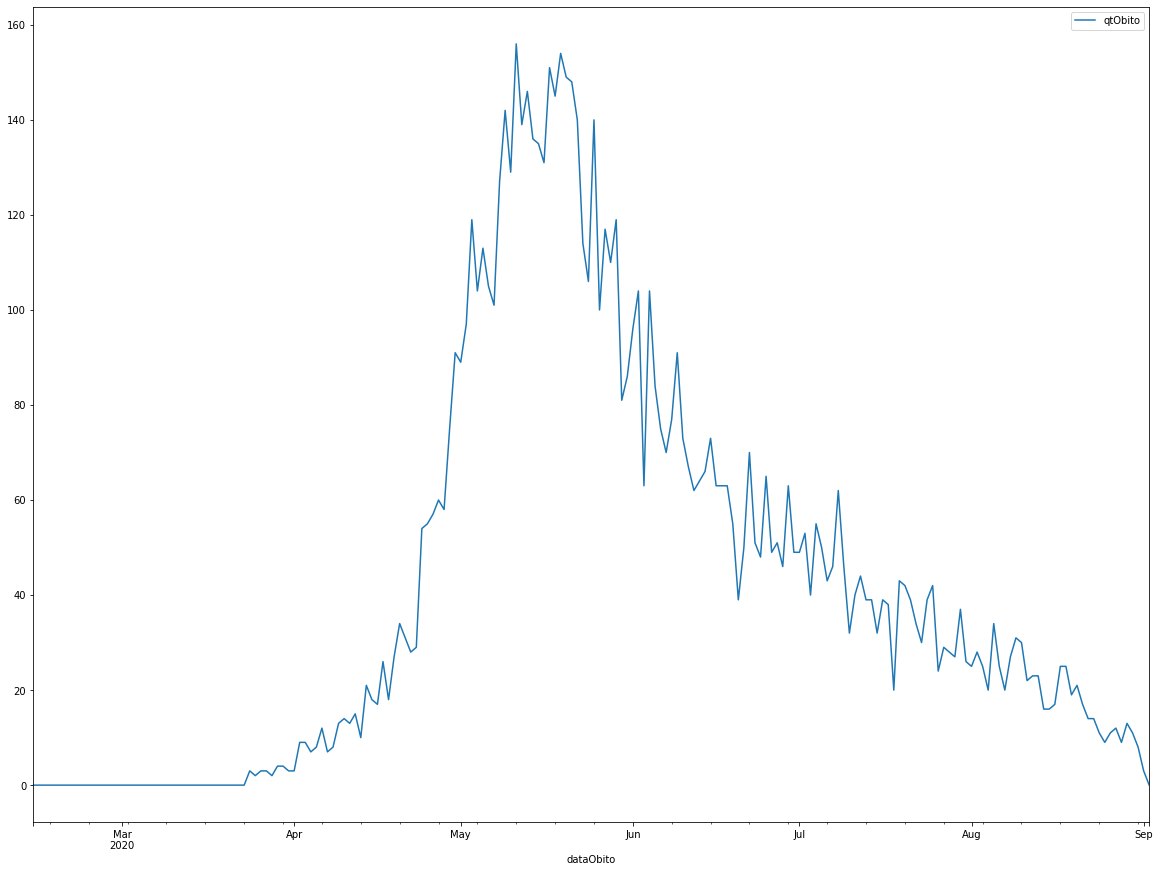

In [54]:
  # agrupar por mes a qtde de obitos e plotar
df_obito.groupby(pd.Grouper(key='dataObito',freq='D')).agg({'qtObito':'sum'}).plot(figsize=(20, 15))

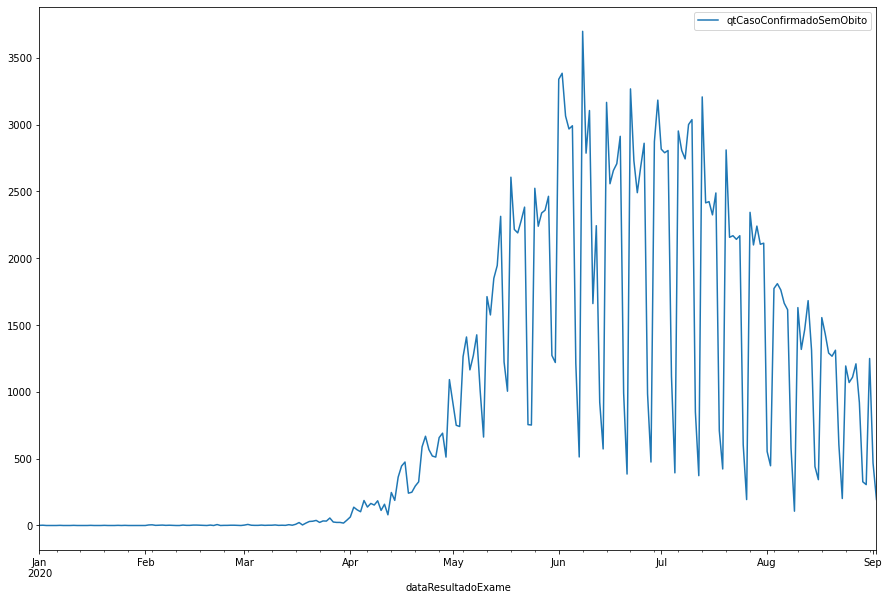

In [60]:
  # agrupar por mes a qtde de casos confirmados SEM óbito e plotar
df_confirmados.groupby(pd.Grouper(key='dataResultadoExame',freq='D')).agg({'qtCasoConfirmadoSemObito':'sum'}).plot(figsize=(15, 10))

**Preparar para plotagem somente de casos confirmados**

In [56]:
group_confirmados = df_confirmados.groupby(by=df_confirmados['dataResultadoExame'].dt.date).count()
group_confirmados

,Unnamed: 0,codigoPaciente,paisPaciente,estadoPaciente,codigoMunicipioPaciente,municipioPaciente,bairroPaciente,sexoPaciente,idadePaciente,dataNotificacao,dataSolicitacaoExame,dataResultadoExame,dataColetaExame,resultadoFinalExame,obitoConfirmado,dataInicioSintomas,dataObito,idSivep,classificacaoEstadoSivep,dataInternacaoSivep,dataEntradaUtisSvep,dataSaidaUtisSvep,evolucaoCasoSivep,dataEvolucaoCasoSivep,comorbidadePuerperaSivep,comorbidadeCardiovascularSivep,comorbidadeHematologiaSivep,comorbidadeSindromeDownSivep,comorbidadeAsmaSivep,comorbidadeDiabetesSivep,comorbidadeNeurologiaSivep,comorbidadePneumopatiaSivep,comorbidadeImunodeficienciaSivep,comorbidadeRenalSivep,comorbidadeObesidadeSivep,comorbidadeHiv,comorbidadeNeoplasias,tipoObito,tipoTesteExame,racaCorPaciente,dataNotificacaoObito,cnesNotificacaoEsus,municipioNotificacaoEsus,qtObito,qtCasoConfirmadoSemObito,faixaIdade
dataResultadoExame,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-01,1,1,0,1,1,1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,1
2020-01-02,2,2,1,2,2,2,1,2,2,2,0,2,2,2,0,2,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,2,0,2,2,2,2,2
2020-01-07,1,1,0,1,1,1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,1
2020-01-11,1,1,0,1,1,1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,1
2020-01-16,1,1,0,1,1,1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-29,327,327,43,327,327,327,307,327,326,284,208,327,327,327,0,283,0,4,4,4,1,0,0,0,1,2,0,0,1,1,0,0,0,1,1,0,0,0,327,327,0,199,282,327,327,322
2020-08-30,306,306,46,306,306,306,298,306,306,255,271,306,306,306,0,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,306,306,0,161,255,306,306,304
2020-08-31,1250,1250,131,1250,1235,1250,1176,1250,1250,1091,584,1250,1250,1250,0,1067,0,8,7,7,4,0,1,1,0,2,0,0,0,2,1,0,2,1,0,0,0,0,1250,1250,0,891,1087,1250,1250,1243


In [57]:
df_confir_graf = group_confirmados['dataResultadoExame']

**Gráfico número de casos confirmados por dia**

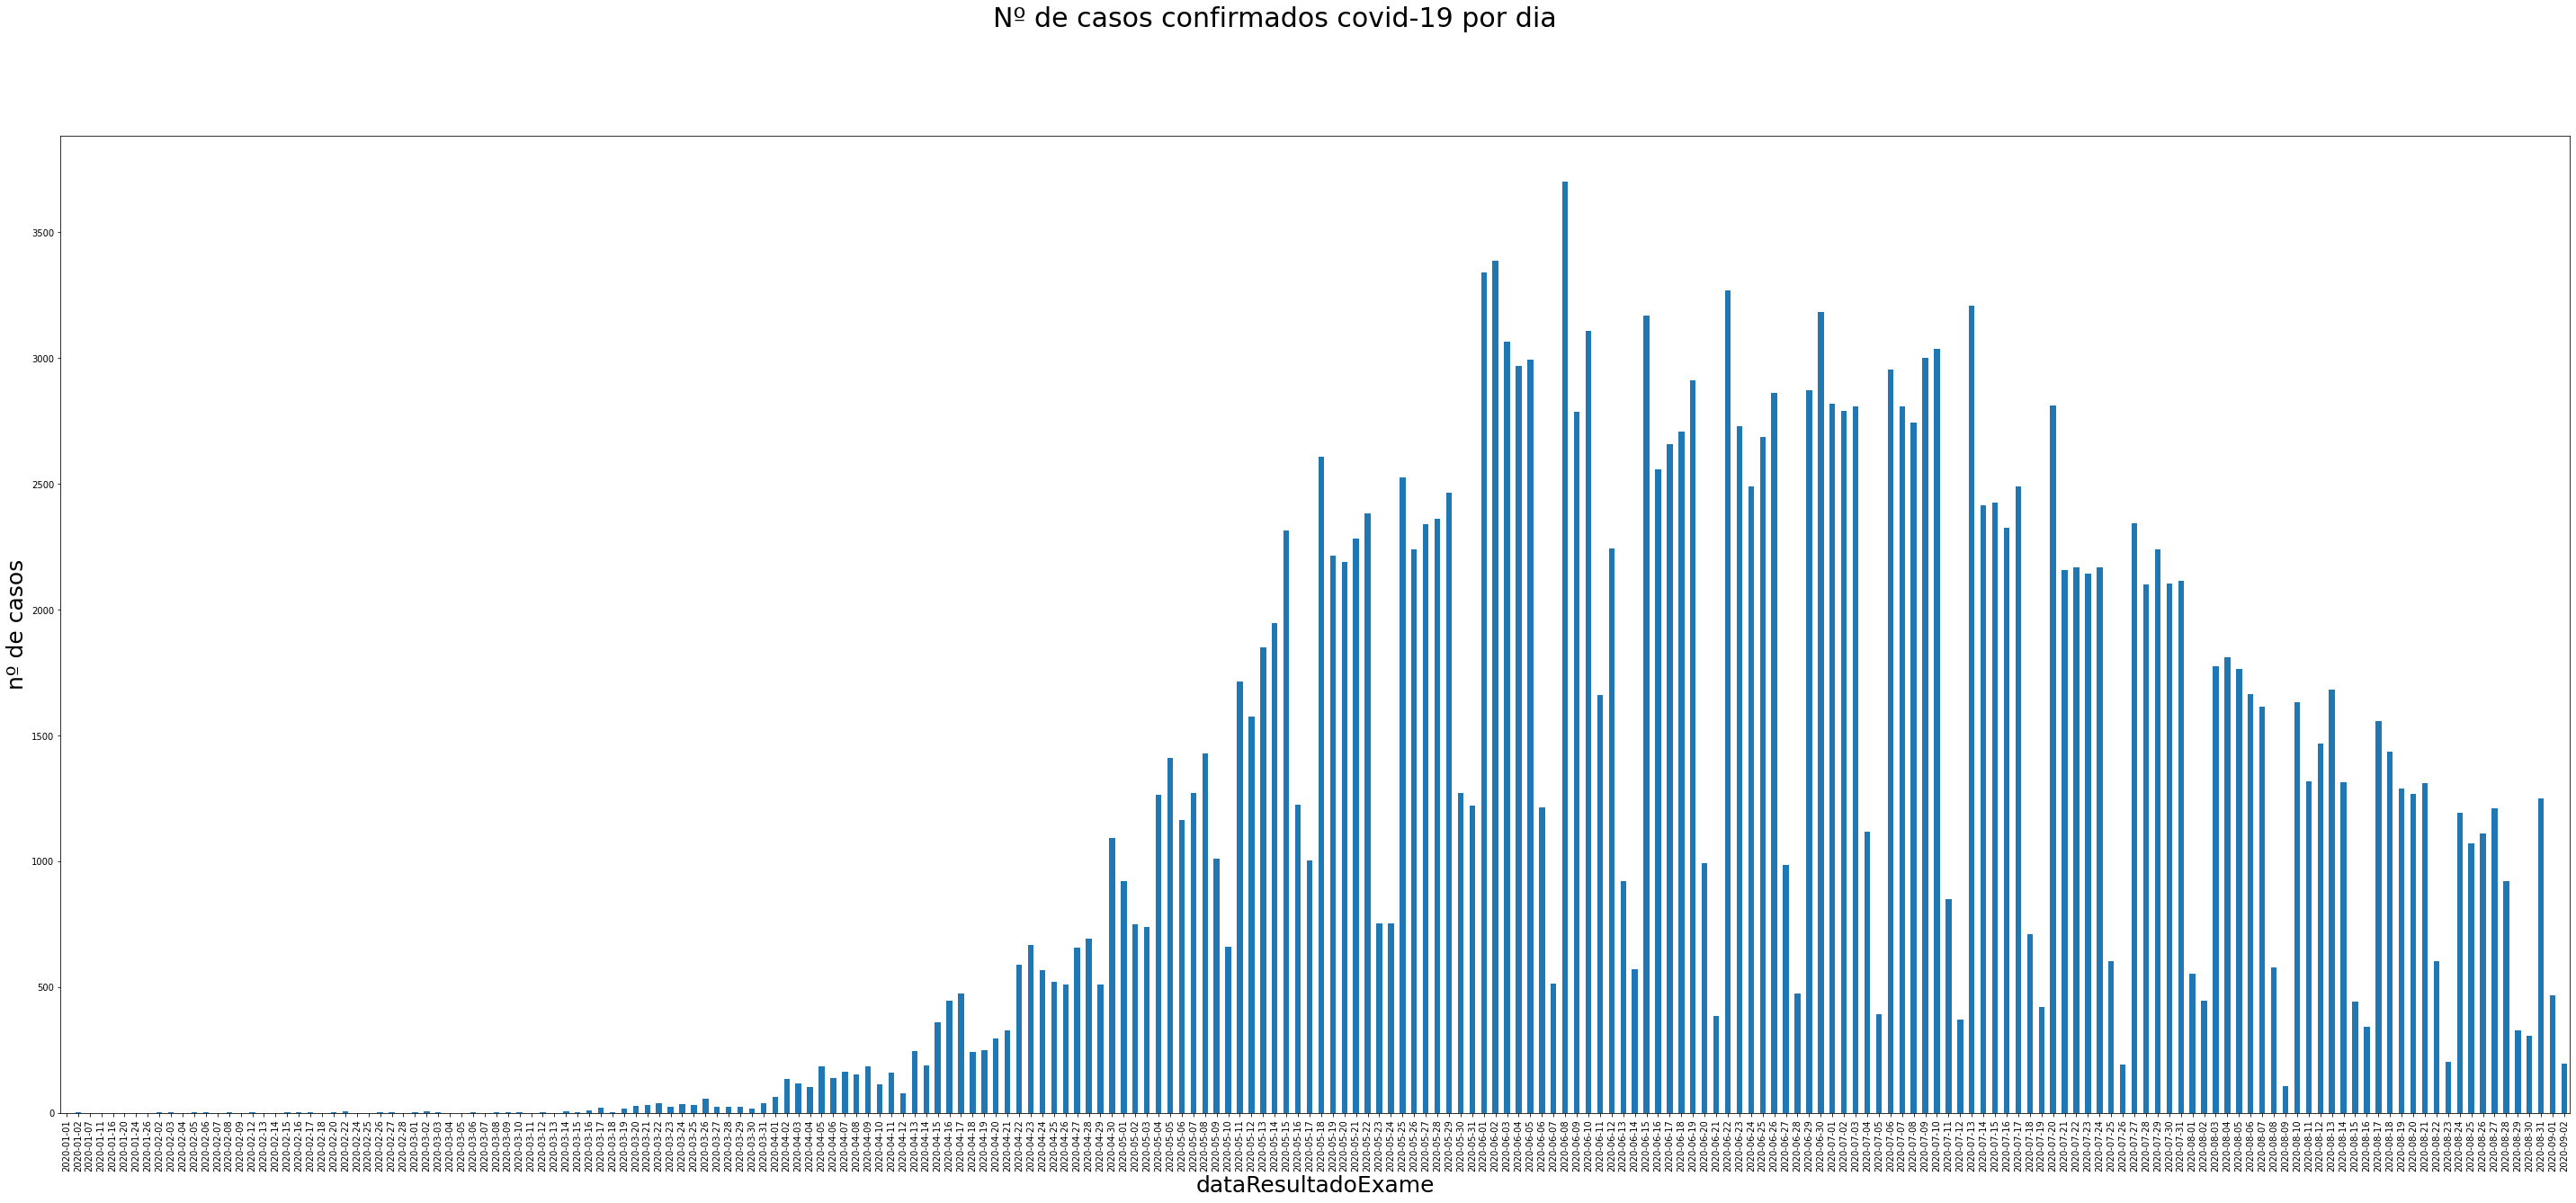

In [66]:
plt.xlabel('Data resultado do exame', fontsize=25) 
plt.ylabel('nº de casos', fontsize=25)
plt.suptitle('Nº de casos confirmados covid-19 por dia', fontsize=30)

df_confir_graf.plot(figsize=(50, 20), kind='bar')

# **Gerar dados somente dos óbitos**

In [38]:
df_obito = df.loc[df['dataObito'].notnull()  ] 
df_obito.head()

,Unnamed: 0,codigoPaciente,paisPaciente,estadoPaciente,codigoMunicipioPaciente,municipioPaciente,bairroPaciente,sexoPaciente,idadePaciente,dataNotificacao,dataSolicitacaoExame,dataResultadoExame,dataColetaExame,resultadoFinalExame,obitoConfirmado,dataInicioSintomas,dataObito,idSivep,classificacaoEstadoSivep,dataInternacaoSivep,dataEntradaUtisSvep,dataSaidaUtisSvep,evolucaoCasoSivep,dataEvolucaoCasoSivep,comorbidadePuerperaSivep,comorbidadeCardiovascularSivep,comorbidadeHematologiaSivep,comorbidadeSindromeDownSivep,comorbidadeAsmaSivep,comorbidadeDiabetesSivep,comorbidadeNeurologiaSivep,comorbidadePneumopatiaSivep,comorbidadeImunodeficienciaSivep,comorbidadeRenalSivep,comorbidadeObesidadeSivep,comorbidadeHiv,comorbidadeNeoplasias,tipoObito,tipoTesteExame,racaCorPaciente,dataNotificacaoObito,cnesNotificacaoEsus,municipioNotificacaoEsus,qtObito,qtCasoConfirmadoSemObito,faixaIdade
196,196,e49ca4b4153fee1ca1955086e46194a7,NaN,CE,230440.0,FORTALEZA,CRISTO REDENTOR,MASCULINO,54.0,2020-05-15,2020-05-15,2020-06-02 17:14:31,2020-05-15 06:00:00,Negativo,NaN,2020-05-12,2020-05-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Descartado,RT PCR,Parda,2020-06-11 09:38:45.110,7434308,FORTALEZA,0,0,51-60
981,981,07c59fc7f348ffe9e5e73977412809af,NaN,CE,230765.0,MARACANAU,JEREISSATE 2,FEMININO,78.0,2020-05-25,2020-05-27,2020-05-28 21:09:25,2020-05-25 09:00:00,Negativo,NaN,2020-05-18,2020-05-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Descartado,RT PCR,Parda,2020-05-27 13:00:30.927,NaN,MARACANAU,0,0,71-80
1082,1082,aa61c7071f7a6cac0f9f5fc8d5086008,NaN,CE,230770.0,MARANGUAPE,UMARIZEIRAS,FEMININO,69.0,2020-04-21,2020-04-22,2020-04-24 20:21:07,2020-04-21 12:00:00,Negativo,NaN,2020-04-18,2020-04-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Descartado,RT PCR,Parda,2020-05-20 17:28:42.393,5345243,MARANGUAPE,0,0,61-70
2854,2854,b12278515abb9dc50c2bd7eb2a5d0e7a,BRASIL,CE,230770.0,MARANGUAPE,NaN,FEMININO,65.0,2020-05-30,2020-06-01,2020-06-05 15:57:50,2020-06-01 06:00:00,Positivo,True,2020-05-27,2020-06-14,3.159216e+11,Positivo,2020-05-31 00:00:00.000,2020-05-31 00:00:00.000,2020-06-02 00:00:00.000,Óbito,2020-06-14 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Confirmado,RT PCR,Não Informado,2020-06-15 11:07:06.913,2554798,MARANGUAPE,1,0,61-70
2920,2920,48d852bd2f0076810e50c3830c2b364c,NaN,CE,230495.0,GUAIÚBA,CHICO DE GOES,MASCULINO,90.0,2020-05-20,2020-05-20,2020-06-09 17:14:23,2020-05-20 09:00:00,Positivo,True,2020-05-08,2020-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Confirmado,RT PCR,Parda,2020-05-20 11:48:16.310,6433952,GUAIUBA,1,0,81E+


**Preparar para plotagem somente dos óbitos**


In [40]:
group_obito = df_obito.groupby(by=df_obito['dataObito'].dt.date).count()
group_obito

,Unnamed: 0,codigoPaciente,paisPaciente,estadoPaciente,codigoMunicipioPaciente,municipioPaciente,bairroPaciente,sexoPaciente,idadePaciente,dataNotificacao,dataSolicitacaoExame,dataResultadoExame,dataColetaExame,resultadoFinalExame,obitoConfirmado,dataInicioSintomas,dataObito,idSivep,classificacaoEstadoSivep,dataInternacaoSivep,dataEntradaUtisSvep,dataSaidaUtisSvep,evolucaoCasoSivep,dataEvolucaoCasoSivep,comorbidadePuerperaSivep,comorbidadeCardiovascularSivep,comorbidadeHematologiaSivep,comorbidadeSindromeDownSivep,comorbidadeAsmaSivep,comorbidadeDiabetesSivep,comorbidadeNeurologiaSivep,comorbidadePneumopatiaSivep,comorbidadeImunodeficienciaSivep,comorbidadeRenalSivep,comorbidadeObesidadeSivep,comorbidadeHiv,comorbidadeNeoplasias,tipoObito,tipoTesteExame,racaCorPaciente,dataNotificacaoObito,cnesNotificacaoEsus,municipioNotificacaoEsus,qtObito,qtCasoConfirmadoSemObito,faixaIdade
dataObito,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-14,1,1,0,1,1,1,1,1,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,1
2020-03-02,1,1,0,1,1,1,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,1
2020-03-18,1,1,0,1,1,1,0,1,1,1,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,1
2020-03-21,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,1
2020-03-22,2,2,2,2,2,2,2,2,2,0,2,2,2,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,0,0,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-29,19,19,14,19,19,19,12,19,18,11,6,10,19,18,14,13,19,8,8,7,5,2,7,7,2,5,2,2,2,3,2,2,2,2,3,0,0,19,19,19,19,6,6,19,19,18
2020-08-30,19,19,11,19,19,19,14,19,18,14,11,14,18,17,13,16,19,8,7,8,7,3,5,5,0,1,0,0,0,2,0,0,0,0,0,0,0,19,19,19,19,9,10,19,19,17
2020-08-31,13,13,9,13,13,13,10,13,13,9,9,8,13,10,11,10,13,6,5,6,4,3,4,4,2,2,2,2,2,3,2,2,2,2,2,0,0,13,13,13,13,7,7,13,13,13


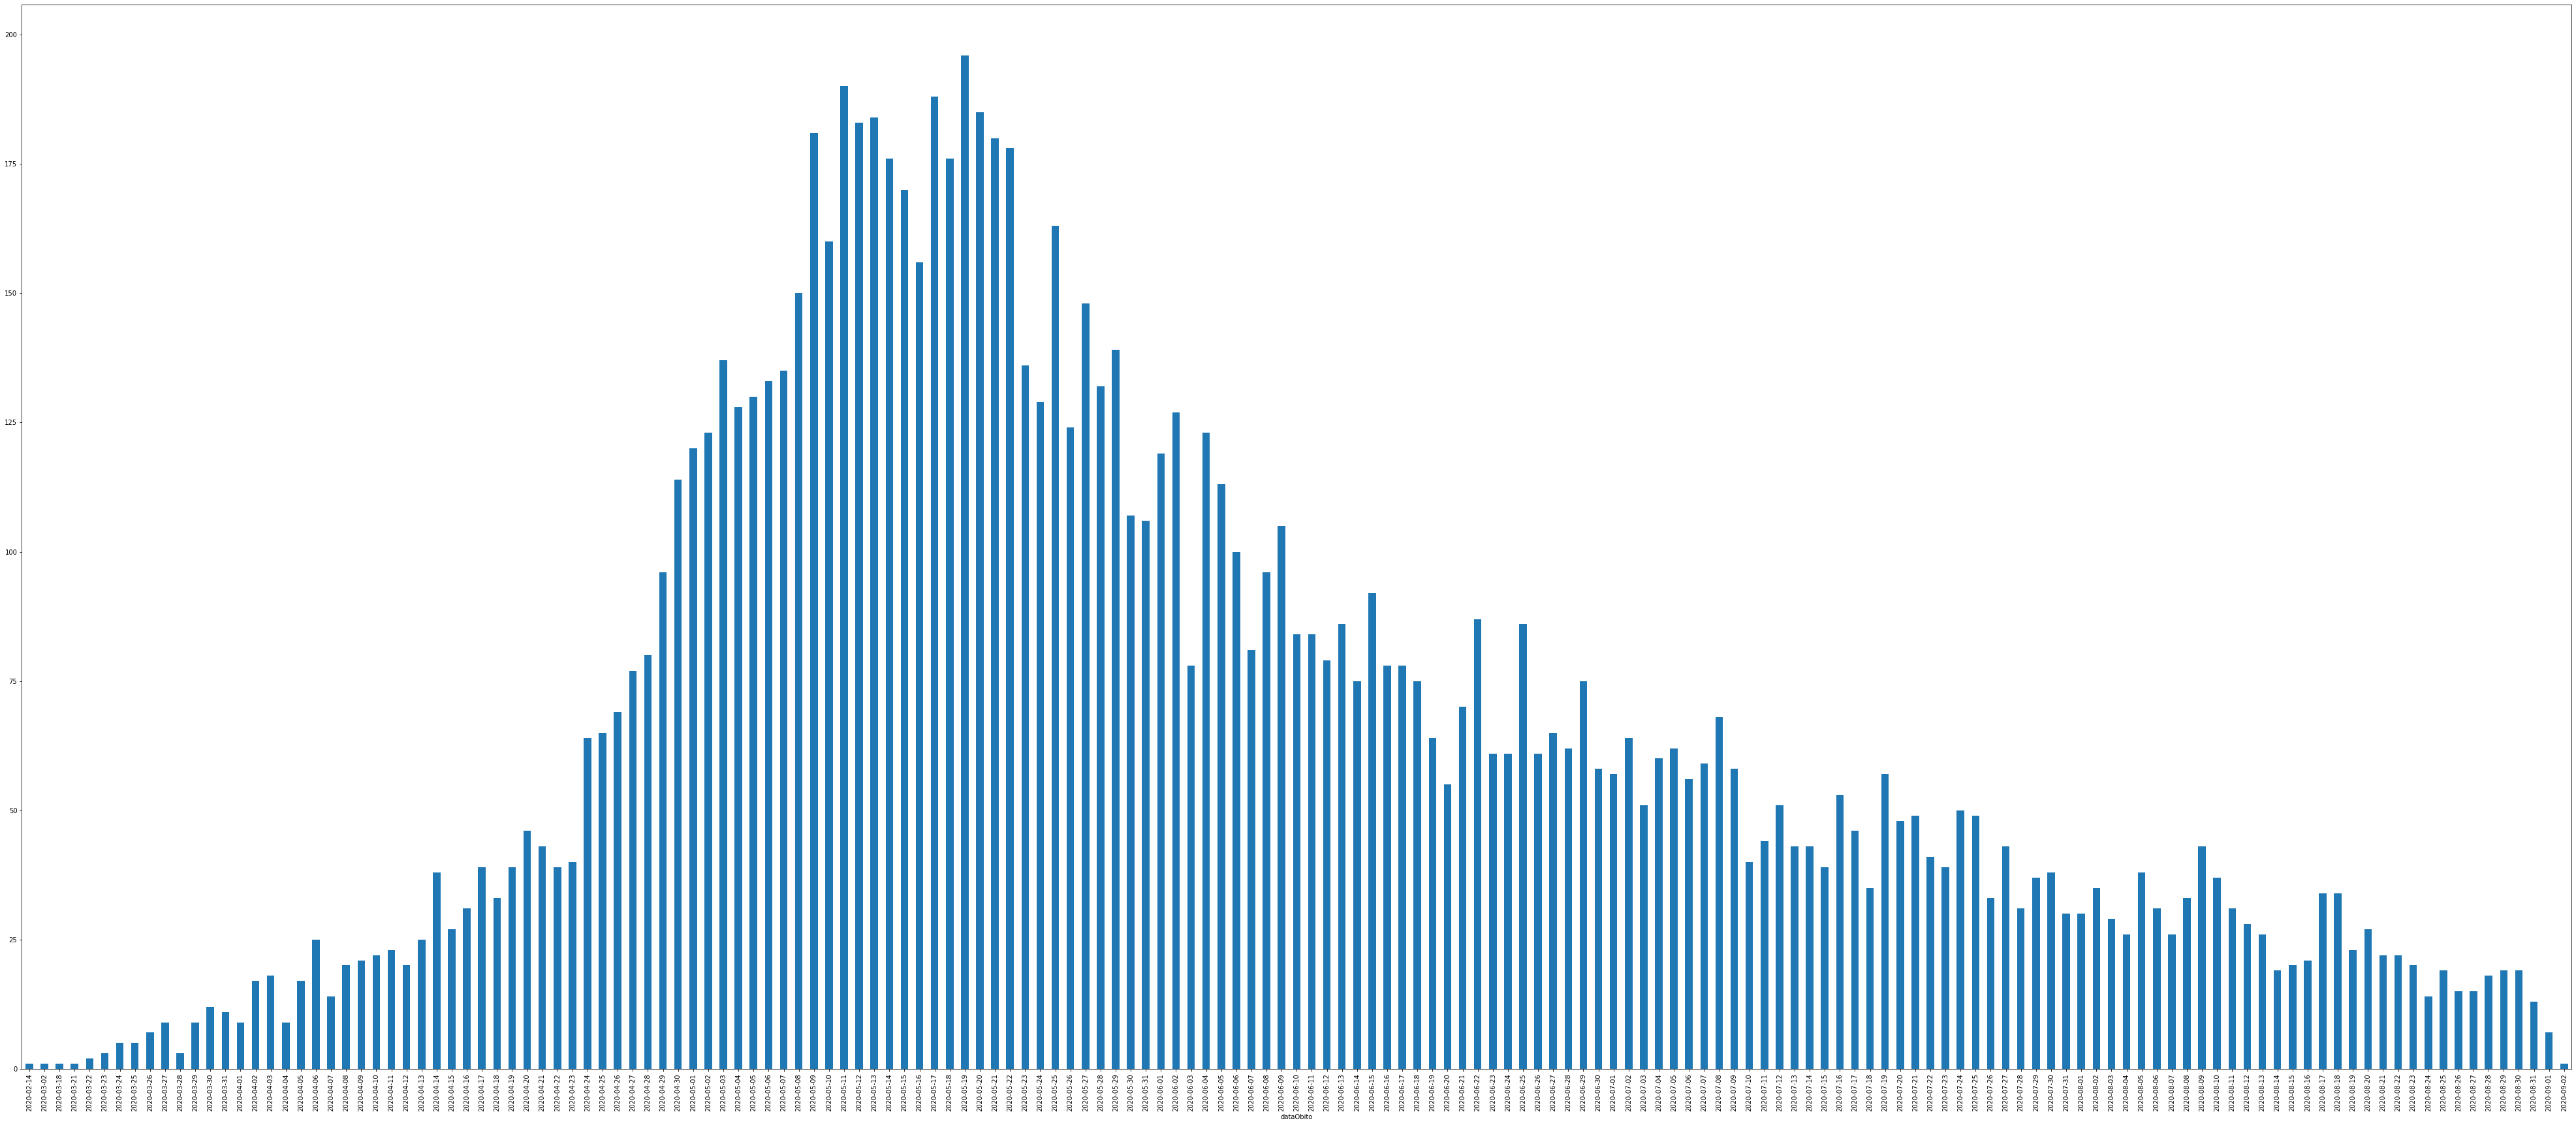

In [41]:
df_ob_graf = group_obito['dataObito']
df_ob_graf.plot(figsize=(70, 30), kind='bar')

In [42]:
group_faixa_idade_obito = df_obito.groupby(by=df_obito['faixaIdade']).count()
group_faixa_idade_obito

,Unnamed: 0,codigoPaciente,paisPaciente,estadoPaciente,codigoMunicipioPaciente,municipioPaciente,bairroPaciente,sexoPaciente,idadePaciente,dataNotificacao,dataSolicitacaoExame,dataResultadoExame,dataColetaExame,resultadoFinalExame,obitoConfirmado,dataInicioSintomas,dataObito,idSivep,classificacaoEstadoSivep,dataInternacaoSivep,dataEntradaUtisSvep,dataSaidaUtisSvep,evolucaoCasoSivep,dataEvolucaoCasoSivep,comorbidadePuerperaSivep,comorbidadeCardiovascularSivep,comorbidadeHematologiaSivep,comorbidadeSindromeDownSivep,comorbidadeAsmaSivep,comorbidadeDiabetesSivep,comorbidadeNeurologiaSivep,comorbidadePneumopatiaSivep,comorbidadeImunodeficienciaSivep,comorbidadeRenalSivep,comorbidadeObesidadeSivep,comorbidadeHiv,comorbidadeNeoplasias,tipoObito,tipoTesteExame,racaCorPaciente,dataNotificacaoObito,cnesNotificacaoEsus,municipioNotificacaoEsus,qtObito,qtCasoConfirmadoSemObito
faixaIdade,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0-10,27,27,16,27,27,27,21,27,27,18,18,20,27,26,16,22,27,11,10,11,3,1,9,9,2,2,2,2,2,2,4,2,2,2,2,0,0,27,27,27,27,8,10,27,27
11-20,45,45,29,45,45,45,38,45,45,30,27,32,44,44,34,36,45,22,21,19,13,5,22,22,5,6,5,6,5,6,7,5,5,5,5,0,0,45,45,45,45,19,23,45,45
21-30,135,135,98,135,135,135,105,135,135,91,75,93,124,128,104,110,135,75,71,67,32,15,66,64,13,18,16,16,17,24,16,15,19,16,17,0,0,135,135,135,135,46,53,135,135
31-40,363,363,277,363,362,363,296,363,363,259,208,256,349,354,284,302,363,220,207,198,113,58,204,195,65,76,61,62,65,80,63,63,67,66,73,0,0,363,363,363,363,111,149,363,363
41-50,640,640,478,639,639,640,534,640,640,476,371,451,587,594,539,552,640,395,370,346,183,96,378,371,130,165,134,132,134,177,137,137,135,134,140,0,0,640,640,640,640,209,273,640,640
51-60,1201,1201,928,1200,1200,1201,1012,1201,1201,913,729,865,1102,1132,1039,1029,1201,774,737,673,315,182,724,711,250,374,261,265,261,393,261,271,270,272,276,0,0,1201,1201,1201,1201,405,531,1201,1201
61-70,2012,2012,1522,2011,2011,2012,1716,2012,2012,1518,1208,1474,1855,1901,1733,1740,2012,1281,1218,1092,539,320,1199,1168,417,644,420,419,420,667,427,423,422,437,426,0,0,2012,2012,2012,2012,713,908,2012,2012
71-80,2675,2675,2068,2675,2674,2674,2256,2675,2675,2053,1635,1989,2480,2545,2329,2309,2675,1731,1628,1472,641,315,1638,1596,595,984,616,611,610,924,651,634,619,626,606,0,0,2675,2675,2675,2675,940,1192,2675,2675
81E+,3100,3100,2298,3100,3100,3100,2560,3100,3100,2376,1850,2296,2855,2924,2575,2699,3100,1944,1834,1529,529,241,1824,1788,602,1063,606,604,604,909,688,631,598,620,597,0,0,3100,3100,3100,3100,1087,1332,3100,3100


In [43]:
counts_obitos_faixa_idade = df_obito.groupby(['faixaIdade', 'sexoPaciente']).faixaIdade.count().unstack()
counts_obitos_faixa_idade

sexoPaciente,FEMININO,MASCULINO
faixaIdade,,
0-10,12,15
11-20,17,28
21-30,61,74
31-40,140,223
41-50,218,422
51-60,472,729
61-70,806,1206
71-80,1168,1507
81E+,1496,1604


**Gerando gráfico de óbitos por faixa de idade**

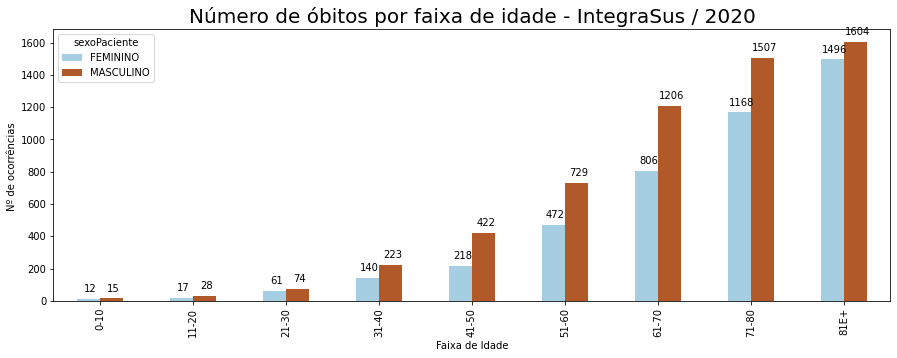

In [44]:
ax = counts_obitos_faixa_idade.plot(kind='bar',stacked = False, colormap = 'Paired', figsize=(15, 5) )

for p in ax.patches:
        ax.annotate(np.round(p.get_height(),decimals=0).astype(np.int64), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(2, 10), textcoords='offset points')

plt.xlabel ('Faixa de Idade')
plt.ylabel ('Nº de ocorrências ')
plt.title('Número de óbitos por faixa de idade - IntegraSus / 2020',fontsize=20)
plt.show()

In [45]:
group_faixa_idade_obito = df_obito.groupby('faixaIdade')
group_faixa_idade_obito['faixaIdade'].count()

faixaIdade
0-10       27
11-20      45
21-30     135
31-40     363
41-50     640
51-60    1201
61-70    2012
71-80    2675
81E+     3100
Name: faixaIdade, dtype: int64

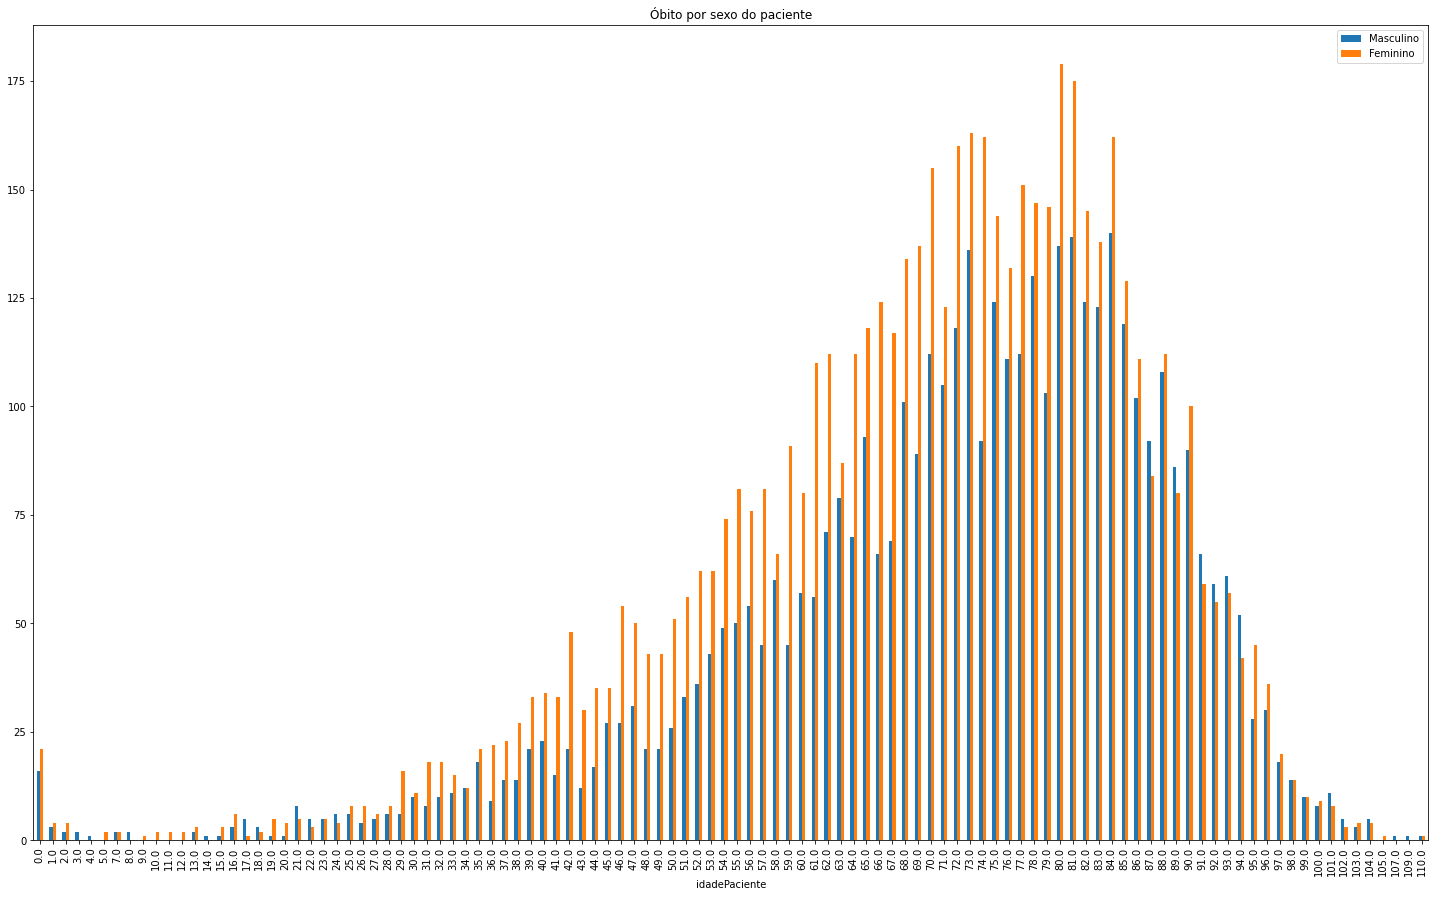

In [46]:
obito_by_sex = df_obito.groupby(['idadePaciente', 'sexoPaciente']).size().unstack('sexoPaciente')
obito_by_sex.columns = ['Masculino', 'Feminino']
obito_by_sex.plot.bar(title='Óbito por sexo do paciente', figsize=(25,15) )

**Casos somente do sexo feminino e faixa menor que 10 anos**

**Gerar novo dataset com somente algumas colunas**

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5355ca80b8>,
      dtype=object)

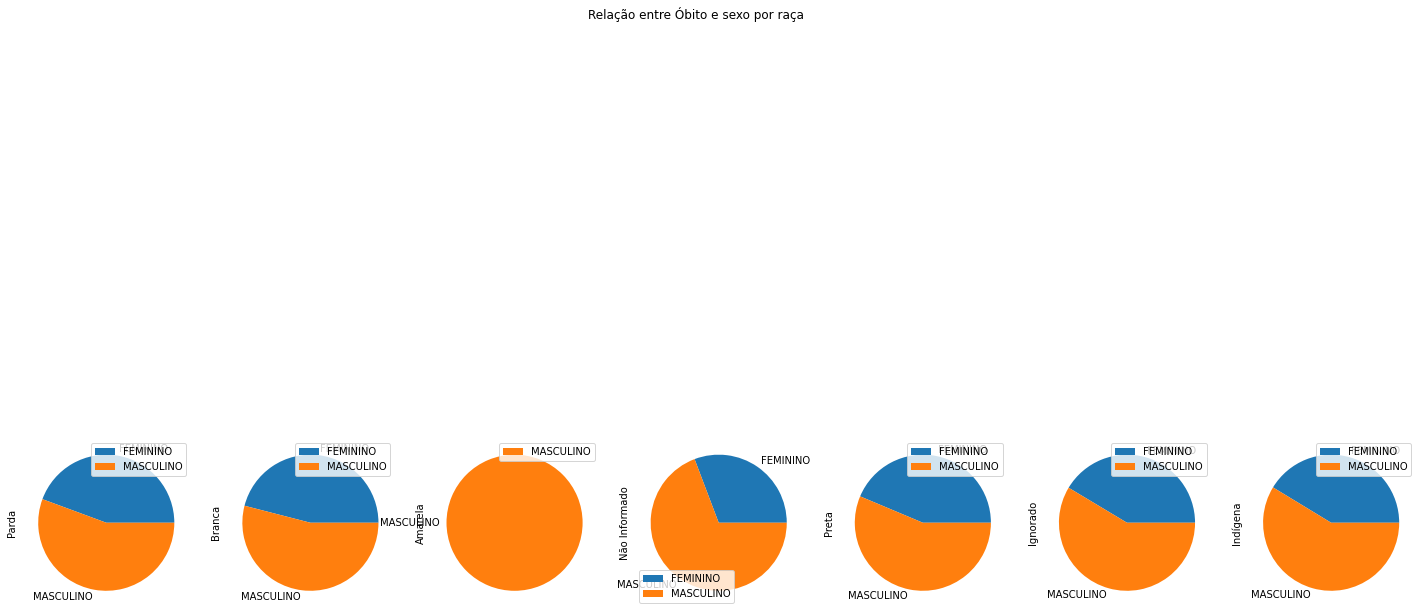

In [50]:
obito_by_sexo = df_obito.groupby([ 'sexoPaciente', 'racaCorPaciente']).size().unstack('racaCorPaciente')
obito_by_sexo.columns =  ['Parda','Branca','Amarela', 'Não Informado','Preta','Ignorado','Indígena']
obito_by_sexo.plot.pie(title='Relação entre Óbito e sexo por raça', figsize=(25,15) , subplots = True , )

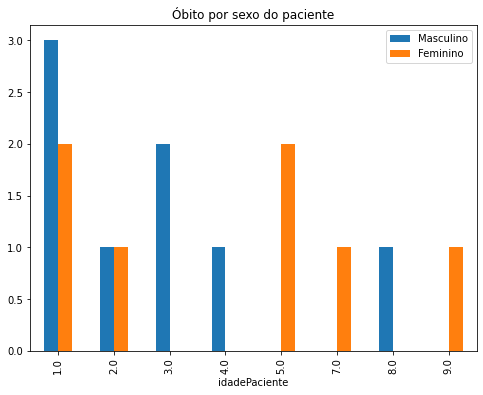

In [51]:
df_obit_faixa1 = df_obito.loc[ (df["obitoConfirmado"] == True) & (df_obito['faixaIdade'] == '0-10') ]
df_obit_plot_faixa1 = df_obit_faixa1.groupby(['idadePaciente', 'sexoPaciente']).size().unstack('sexoPaciente')
df_obit_plot_faixa1.columns = ['Masculino', 'Feminino']
df_obit_plot_faixa1.plot.bar(title='Óbito por sexo do paciente', figsize=(8,6) )

In [ ]:
df_obit_faixa2 = df_obito.loc[ (df["obitoConfirmado"] == True) & (df_obito['idadePaciente'] >= 10.0) & (df_obito['idadePaciente'] < 15.0)]
df_obit_plot_faixa2 = df_obit_faixa2.groupby(['idadePaciente', 'sexoPaciente']).size().unstack('sexoPaciente')
df_obit_plot_faixa2.columns = ['Masculino', 'Feminino']
df_obit_plot_faixa2.plot.bar(title='Óbito por sexo do paciente - entre 0 e 10 anos', figsize=(8,6) )

In [ ]:
df_obit_faixa3 = df_obito.loc[ (df_obito['idadePaciente'] >= 15.0) & (df_obito['idadePaciente'] < 20.0)]
df_obit_plot_faixa3 = df_obit_faixa3.groupby(['idadePaciente', 'sexoPaciente']).size().unstack('sexoPaciente')
df_obit_plot_faixa3.columns = ['Masculino', 'Feminino']
df_obit_plot_faixa3.plot.bar(title='Óbito por idade do paciente - entre 15 e 20 anos', figsize=(8,6) )

In [ ]:
df_obit_faixa4 = df_obito.loc[ (df_obito['idadePaciente'] >= 20.0) & (df_obito['idadePaciente'] < 40.0)]
df_obit_plot_faixa4 = df_obit_faixa4.groupby(['idadePaciente', 'sexoPaciente']).size().unstack('sexoPaciente')
df_obit_plot_faixa4.columns = ['Masculino', 'Feminino']
df_obit_plot_faixa4.plot.bar(title='Óbito por idade do paciente - entre 20 e 40 anos', figsize=(8,6) )

In [ ]:
df_obit_faixa5 = df_obito.loc[ (df_obito['idadePaciente'] >= 40.0) & (df_obito['idadePaciente'] < 60.0)]
df_obit_plot_faixa5 = df_obit_faixa5.groupby(['idadePaciente', 'sexoPaciente']).size().unstack('sexoPaciente')
df_obit_plot_faixa5.columns = ['Masculino', 'Feminino']
df_obit_plot_faixa5.plot.bar(title='Óbito por idade do paciente - entre 40 e 60 anos', figsize=(8,6) )

In [ ]:
df_obit_faixa6 = df_obito.loc[ (df_obito['idadePaciente'] >= 60.0) & (df_obito['idadePaciente'] < 120.0)]
df_obit_plot_faixa6 = df_obit_faixa6.groupby(['idadePaciente', 'sexoPaciente']).size().unstack('sexoPaciente')
df_obit_plot_faixa6.columns = ['Masculino', 'Feminino']
df_obit_plot_faixa6.plot.bar(title='Óbito por sexo do paciente - Entre 60 e 120 anos', figsize=(10,6) )